In [4]:
import tensorflow as tf
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
# from tensorflow.keras 
# import keras.api._v2.keras as keras
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dense , MaxPooling2D , Conv2D
from keras.models import Model
from keras.layers import Input , Activation , Add
from keras.optimizers import Adam , Adadelta , Adamax,Adagrad  , RMSprop
from keras.regularizers import l2 





In [1]:
fldr = './utkcropped'


In [2]:
import os
files = os.listdir(fldr)


In [5]:

imgs = []
for fle in files:
    # age = fle.split('_')[0]
    # gender = fle.split('_')[1]
    total = fldr+'/'+fle
    print(total)
    imge = cv2.imread(total)
    imge = cv2.cvtColor(imge , cv2.COLOR_BGR2RGB)
    imge = cv2.resize(imge , (48,48))
    imgs.append(imge)

./utkcropped/100_0_0_20170112213500903.jpg.chip.jpg
./utkcropped/100_0_0_20170112215240346.jpg.chip.jpg
./utkcropped/100_1_0_20170110183726390.jpg.chip.jpg
./utkcropped/100_1_0_20170112213001988.jpg.chip.jpg
./utkcropped/100_1_0_20170112213303693.jpg.chip.jpg
./utkcropped/100_1_0_20170112215032192.jpg.chip.jpg
./utkcropped/100_1_0_20170117195420803.jpg.chip.jpg
./utkcropped/100_1_0_20170119212053665.jpg.chip.jpg
./utkcropped/100_1_2_20170105174847679.jpg.chip.jpg
./utkcropped/100_1_2_20170112213615815.jpg.chip.jpg
./utkcropped/100_1_2_20170112222336458.jpg.chip.jpg
./utkcropped/101_0_0_20170112213500903.jpg.chip.jpg
./utkcropped/101_1_2_20170105174739309.jpg.chip.jpg
./utkcropped/103_0_2_20170112213001988.jpg.chip.jpg
./utkcropped/105_0_0_20170112213001988.jpg.chip.jpg
./utkcropped/105_1_0_20170112213001988.jpg.chip.jpg
./utkcropped/105_1_0_20170112213021902.jpg.chip.jpg
./utkcropped/105_1_0_20170112213507183.jpg.chip.jpg
./utkcropped/105_1_1_20170112213303693.jpg.chip.jpg
./utkcropped

In [6]:
ages = []
genders = []
for fle in files:
    age =  fle.split('_')[0]
    gender = fle.split('_')[1]
    ages.append(age)
    genders.append(gender)

print(ages)

     


['100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '101', '101', '103', '105', '105', '105', '105', '105', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '1

10
0


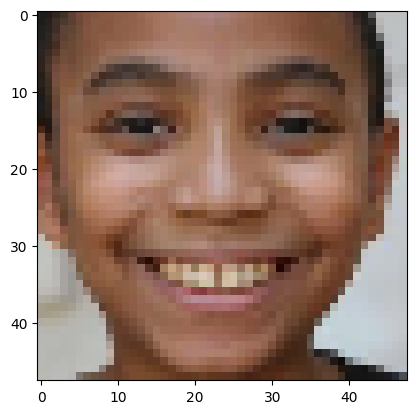

In [7]:
plt.imshow(imgs[87])
print(ages[87])
print(genders[87])


In [8]:
images_f = np.array(imgs)
ages_f = np.array(ages)
genders_f = np.array(genders)


<class 'numpy.ndarray'>


In [8]:
np.save(fldr+'image.npy' , images_f)
np.save(fldr+'ages.npy' , ages_f)
np.save(fldr+'genders.npy' , genders_f)



In [11]:
values, counts = np.unique(genders_f,return_counts=True)
print(counts)
print(values)



[12391 11317     1]
['0' '1' '3']


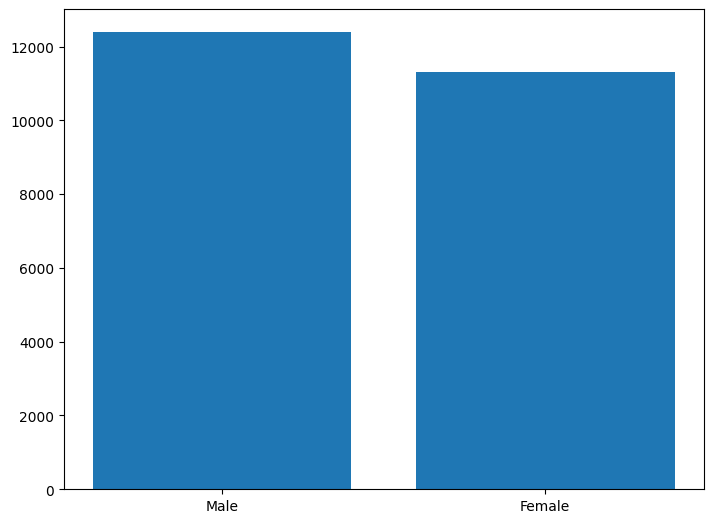

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
genderss = ['Male' , 'Female']
values = [12391, 11317]
ax.bar(genderss , values)
plt.show()


In [13]:
values , counts = np.unique(ages_f , return_counts=True)
print(counts)



[1123  156   11    2    1    5   65    5    1    3    4  130   81  157
  177  247  158  262   98  482  284  346  395  426  859  734 2197  615
  918  570  289  724  350  664  143  409  880  483  293  325  266  273
  526  132  266  157  100  440  153  170  153  148  196  381  138  232
  241  353  268  236   97  271   82  131  293  162  125  103   50  259
   77   94  100   56  139  147   33   98   63   32  148   58   28   69
   23  263  133   22   40   18   24  155   35   10   34   33  166   82
    2   13    5    9   17    9]


In [14]:
print(values)

['1' '10' '100' '101' '103' '105' '11' '110' '111' '115' '116' '12' '13'
 '14' '15' '16' '17' '18' '19' '2' '20' '21' '22' '23' '24' '25' '26' '27'
 '28' '29' '3' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '4' '40'
 '41' '42' '43' '44' '45' '46' '47' '48' '49' '5' '50' '51' '52' '53' '54'
 '55' '56' '57' '58' '59' '6' '60' '61' '62' '63' '64' '65' '66' '67' '68'
 '69' '7' '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '8' '80' '81'
 '82' '83' '84' '85' '86' '87' '88' '89' '9' '90' '91' '92' '93' '95' '96'
 '99']


In [15]:
val = list(values)
cnt = counts.tolist()


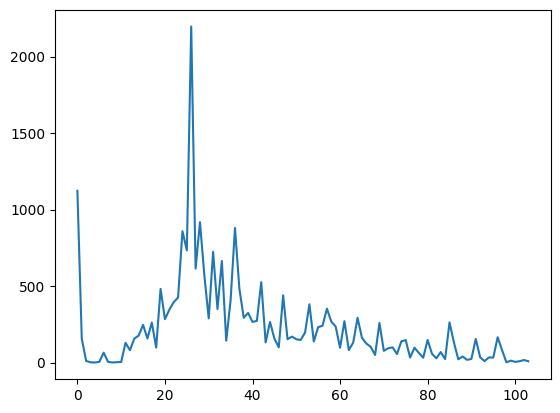

In [16]:
plt.plot(counts)
plt.show()





In [17]:
labels = []
i =0 
while i<len(ages):
    label = []
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i+=1
# print(len(ages))
# print(len(genders))

In [18]:
print(labels)

[['100', '0'], ['100', '0'], ['100', '1'], ['100', '1'], ['100', '1'], ['100', '1'], ['100', '1'], ['100', '1'], ['100', '1'], ['100', '1'], ['100', '1'], ['101', '0'], ['101', '1'], ['103', '0'], ['105', '0'], ['105', '1'], ['105', '1'], ['105', '1'], ['105', '1'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10', '0'], ['10'

In [19]:
# Implementing Feature Scaling so the value are in between 0 and 1. So,it'll easy for the model for prediction.
images_f2 = images_f/255
# print(images_f2)


In [20]:
labels_f = np.array(labels)
# print((labels_f))
images_f2.shape



(23709, 48, 48, 3)

In [22]:
labels_fz = labels_f.astype(int)

print(labels_fz)


[[100   0]
 [100   0]
 [100   1]
 ...
 [  9   1]
 [  9   1]
 [  9   1]]


In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train, y_test = train_test_split(images_f2,labels_fz,test_size=0.25)



In [24]:
# Left size age and right side gender.
y_train[0:5]


array([[20,  1],
       [ 6,  0],
       [ 1,  1],
       [25,  0],
       [46,  1]])

In [25]:
# Every age in y_train with the parameter 1(female gender) and every age in y_train with the parameter 0(male gender).
# Seperate them w.r.t an gender 0 and 1.Same for y_test.
y_train_2 = [y_train[:,1],y_train[:,0]]
y_test_2 = [y_test[:,1],y_test[:,0]]


In [26]:
# y_train[0] have a gender value 0 and 1 and y_train[1] have a age with age values.2d Matrix.
print(y_train_2[0][:5])
print(y_train_2[1][0:5])




[1 0 1 0 1]
[20  6  1 25 46]


In [27]:
print(type(y_test_2))

<class 'list'>


In [25]:
print(y_test_2[0][:5])
print(y_test_2[1][:5])


[0 1 1 0 1]
[19 26 18 52 44]


In [28]:
def Convolution(input_tesnor , filters):
    # Given filteration,kernal_size,padding,strides,kernel_regularizer=learning_rate=0.001
    x = Conv2D(filters=filters , kernel_size=(3,3) , padding='same' , strides=(1,1),kernel_regularizer=l2(0.001))(input_tesnor)
    # To reslove the overfitting problem use Dropout.
    x = Dropout(0.1)(x)
    # Activate the x
    x = Activation('relu')(x)
    return x


In [29]:
# Defining Convolution Layers.
def model(input_shape):
    inputs = Input((input_shape))
    # Convolution layers:If more layers it'll create a biasness.If less layer it'll gives less accuracy.
    # So here taken 4 convolution layer.In testing whatever needed we will fixed with that.
    # 32 indicates a no.of filters.There's no such a fixed no.of filters.In image classification and object detection we will use state of art algorithm(currently best filters).
    conv1 = Convolution(inputs , 32)
    maxpool_1 = MaxPooling2D(pool_size=(2,2))(conv1)
    conv2 = Convolution(maxpool_1,64)
    maxpool_2 = MaxPooling2D(pool_size=(2,2))(conv2)
    conv3 = Convolution(maxpool_2 , 128)
    maxpool_3 = MaxPooling2D(pool_size=(2,2))(conv3)
    conv4 = Convolution(maxpool_3 , 256)
    maxpool_4 = MaxPooling2D(pool_size=(2,2))(conv4)
    flatten = Flatten()(maxpool_4)

    # Dense(64) indicates as 64 neurons.dense 1 do the ann seperatly and dense 2 do the ann seperatly the value is from flatten layer and relu activation function and consists of 1 hidden layer of 64 neuron.
    dense_1 = Dense(64,activation='relu')(flatten)
    dense_2 = Dense(64,activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)

    # Dense(1) indicates my output layer have 1 neuron for both the sex and age output.
    output_1 = Dense(1,activation='sigmoid',name = 'sex_out')(drop_1)
    output_2 = Dense(1,activation='relu',name = 'age_out')(drop_2)
    model = Model(inputs=[inputs], outputs = [output_1,output_2])
    model.compile(loss=['binary_crossentropy','mae'],optimizer='Adam',metrics=['accuracy'])
    return model


In [30]:
# 48x48: Image width and height.
# 3: Number of color channels (RGB) for the colored image.
Model = model((48,48,3))

In [31]:
Model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [32]:
print(y_train_2)

[array([1, 0, 1, ..., 1, 1, 1]), array([20,  6,  1, ..., 28,  5, 26])]


In [33]:
# Importing Model checkpoints:
from keras.callbacks import ModelCheckpoint

In [37]:
file_s = 'Age_Sex_Detection.h5'
# Monitoring=validation_loss
checkpoint = ModelCheckpoint(file_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
# When model learns the best and didn't give the best output more than that then we'll stop it.
# patience=75 it'll wait till 75 epoch.for 75 epoch it'll gave the same loss after that it'll stop training the model.Till 75 epochs my validation loss will not change then it'll call early stop and stooped the training.
Early_stop = tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list = [checkpoint,Early_stop]



In [38]:
print(X_train.shape)
print(X_test.shape)

print(len(X_train))
print(len(y_train_2))
print(len(X_test))
print(len(y_test_2))
print(callback_list)

(17781, 48, 48, 3)
(5928, 48, 48, 3)
17781
2
5928
2
[<keras.src.callbacks.ModelCheckpoint object at 0x000001EC158070A0>, <keras.src.callbacks.EarlyStopping object at 0x000001EB386C2C80>]


In [33]:
# Train the model.
# Model Started Learning out here.
# batch_size=64 is a one of the hyperparameter that can be tunned
History  = Model.fit(X_train,y_train_2,batch_size=64,validation_data=(X_test,y_test_2),epochs=250,callbacks=callback_list)



Epoch 1/250


278/278 [==============================] - ETA: 0s - loss: 17.1916 - sex_out_loss: 0.6951 - age_out_loss: 16.3302 - sex_out_accuracy: 0.5369 - age_out_accuracy: 0.0473
Epoch 1: val_loss improved from inf to 16.41223, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 30s 97ms/step - loss: 17.1916 - sex_out_loss: 0.6951 - age_out_loss: 16.3302 - sex_out_accuracy: 0.5369 - age_out_accuracy: 0.0473 - val_loss: 16.4122 - val_sex_out_loss: 0.6912 - val_age_out_loss: 15.5750 - val_sex_out_accuracy: 0.5317 - val_age_out_accuracy: 0.0472
Epoch 2/250
  1/278 [..............................] - ETA: 21s - loss: 16.2414 - sex_out_loss: 0.6893 - age_out_loss: 15.4061 - sex_out_accuracy: 0.6406 - age_out_accuracy: 0.0469

c:\Users\sayed\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - ETA: 0s - loss: 14.8039 - sex_out_loss: 0.6762 - age_out_loss: 13.9646 - sex_out_accuracy: 0.5982 - age_out_accuracy: 0.0474
Epoch 2: val_loss improved from 16.41223 to 14.64837, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 23s 83ms/step - loss: 14.8039 - sex_out_loss: 0.6762 - age_out_loss: 13.9646 - sex_out_accuracy: 0.5982 - age_out_accuracy: 0.0474 - val_loss: 14.6484 - val_sex_out_loss: 0.6512 - val_age_out_loss: 13.8103 - val_sex_out_accuracy: 0.6046 - val_age_out_accuracy: 0.0472
Epoch 3/250
278/278 [==============================] - ETA: 0s - loss: 12.5185 - sex_out_loss: 0.6372 - age_out_loss: 11.6674 - sex_out_accuracy: 0.6597 - age_out_accuracy: 0.0457
Epoch 3: val_loss improved from 14.64837 to 12.49034, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 23s 83ms/step - loss: 12.5185 - sex_out_loss: 0.6372 - age_out_loss: 11.6674 - sex_out_accuracy: 0.6597 - age_out_ac

Plotting Results.

In [34]:
Model.evaluate(X_test,y_test_2)

186/186 [==============================] - 2s 10ms/step - loss: 7.3361 - sex_out_loss: 0.2575 - age_out_loss: 6.1970 - sex_out_accuracy: 0.8925 - age_out_accuracy: 0.0472


[7.336123943328857,
 0.2574615180492401,
 6.197013854980469,
 0.8925438523292542,
 0.047233469784259796]

In [35]:
pred = Model.predict(X_test)

186/186 [==============================] - 2s 9ms/step


In [36]:
pred[1]

array([[21.275412],
       [37.474678],
       [23.227562],
       ...,
       [30.818022],
       [68.18486 ],
       [26.305237]], dtype=float32)

In [37]:
pred[0]

array([[0.3336973 ],
       [0.97344416],
       [0.9988622 ],
       ...,
       [0.99883276],
       [0.06847758],
       [0.03096404]], dtype=float32)

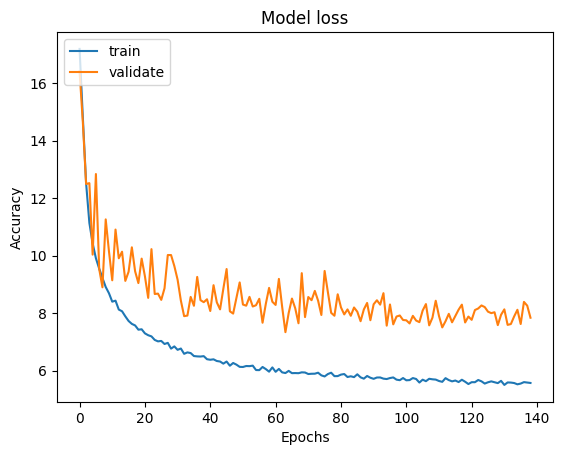

In [38]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model loss')
plt.legend(['train' , 'validate'] , loc = 'upper left')
plt.show()

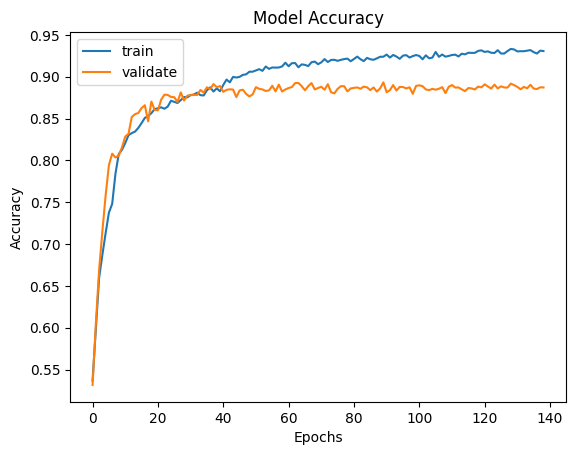

In [39]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['train' , 'validate'] , loc = 'upper left')
plt.show()

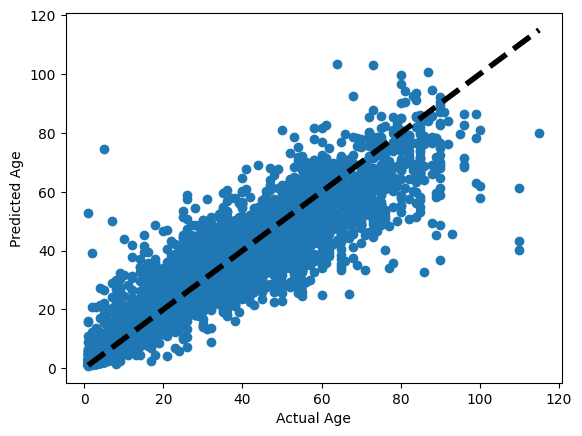

In [42]:
fig,ax = plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min() , y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

Report of a model (Gender Only)

In [70]:
# Doing a roundoff of a age values so it be either 0 or 1.
i = 0
pred_l = []
while(i<len(pred[0])):
    pred_l.append(int(np.round(pred[0][i])))
    i += 1



In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [72]:
report = classification_report(y_test_2[0] , pred_l)
# print(len(pred_l))
# print(pred_l)
# print(pred[0][1])

In [73]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3117
           1       0.90      0.87      0.88      2811

    accuracy                           0.89      5928
   macro avg       0.89      0.89      0.89      5928
weighted avg       0.89      0.89      0.89      5928



In [74]:
results = confusion_matrix(y_test_2[0] , pred_l)

<AxesSubplot: >

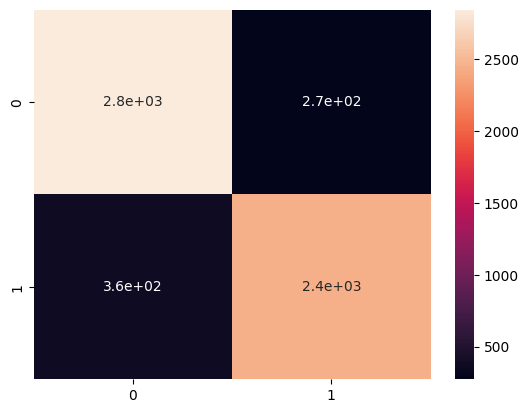

In [75]:
import seaborn as sns
sns.heatmap(results, annot=True)


In [86]:
def test_image(ind , images_f , images_f2 , Model):
    plt.imshow(images_f[ind])
    image_test = images_f2[ind]
    pred_l = Model.predict(np.array([image_test]))
    sex_f = ['Male' , 'Female']
    age = int(np.round(pred_l[1][0]))   
    sex = int(np.round(pred_l[0][0]))
    print('Predicted age is:' + str(age))
    print('Predicted gender is: ' + sex_f[sex])

1/1 [==============================] - 0s 54ms/step
Predicted age is:93
Predicted gender is: Female


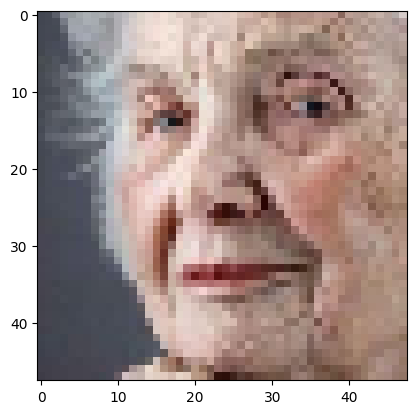

In [87]:
test_image(4, images_f , images_f2 , Model)

1/1 [==============================] - 0s 48ms/step
Predicted age is:8
Predicted gender is: Male


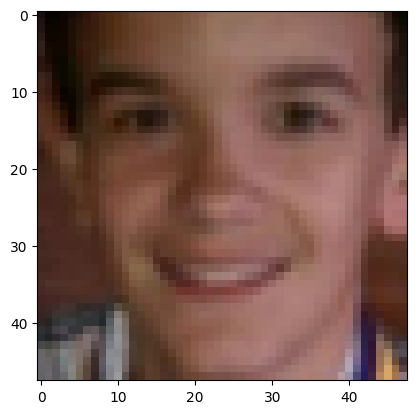

In [88]:
test_image(23,images_f , images_f2 , Model)

Error in gender in this case.

1/1 [==============================] - 0s 56ms/step
Predicted age is:16
Predicted gender is: Male


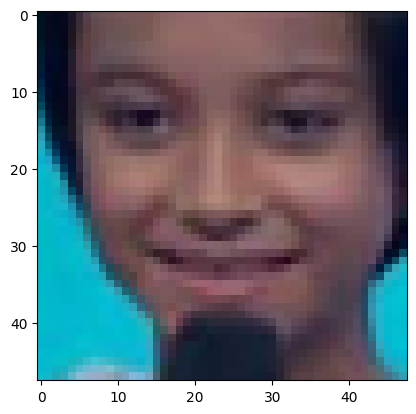

In [93]:
test_image(168,images_f,images_f2,Model)

1/1 [==============================] - 0s 49ms/step
Predicted age is:21
Predicted gender is: Male


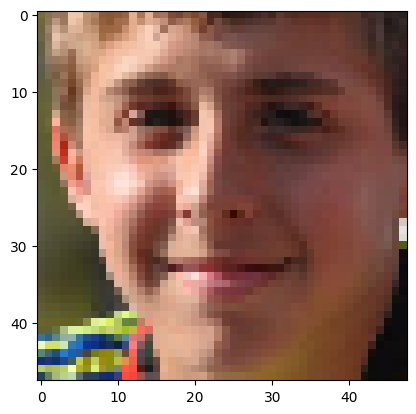

In [91]:
test_image(888,images_f,images_f2,Model)

1/1 [==============================] - 0s 57ms/step
Predicted age is:28
Predicted gender is: Female


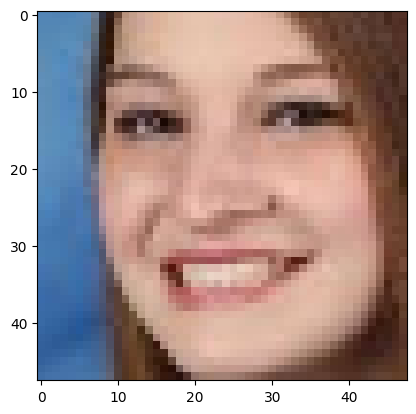

In [92]:
test_image(1288,images_f,images_f2,Model)

In [129]:
labelzz = []
for i in range(len(labels_fz)):
    if labels_fz[i][1] ==3:
        labelzz.append(labels_fz[i])

labelzz = np.array(labelzz)
# print(labelzz)
# print(type(labelzz))

    


In [149]:
index_to_remove = np.where(np.all(labels_fz == labelzz  ,axis=1))[0]
index_duplicato = index_to_remove
print(index_duplicato)

[20805]


In [150]:
labels_fz = np.delete(labels_fz , index_to_remove  ,axis=0)


In [163]:
value , counts = np.unique(labels_fz, return_counts=True)
# print(labels_fz)
print(value)
print(counts)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  95  96  99 100 101 103 105 110 111 115 116]
[12391 12440   482   289   273   196   131   139   263   166   156    65
   130    81   157   177   247   158   262    98   284   346   395   426
   859   734  2197   615   918   570   724   350   664   143   409   880
   483   293   325   266   526   132   266   157   100   440   153   170
   153   148   381   138   232   241   353   268   236    97   271    82
   293   161   125   103    50   259    77    94   100    56   147    33
    98    63    32   148    58    28    69    23   133    22    40    18
    24   155    35    10    34    33    82     2    13     5  

In [170]:
gender_count = []
for i in range(len(labels_fz)):
    gender_count.append(labels_fz[i][1])

print(gender_count)


[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [171]:
gender_count = np.array(gender_count)


In [172]:
value , count = np.unique(gender_count , return_counts=True)
print(value)
print(count)


[0 1]
[12391 11317]


The Below image is a error in a utk dataset given gender parameter as 3. and it's a duplicate image.

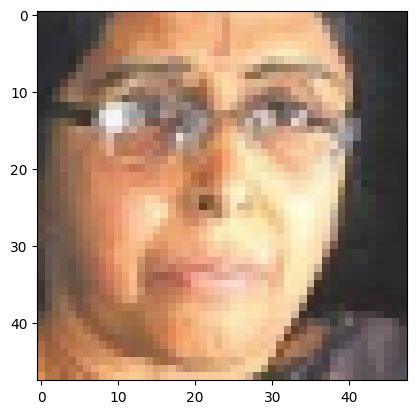

In [182]:
plt.imshow(imgs[20805])

In [191]:
removed_img = imgs.pop(20805)


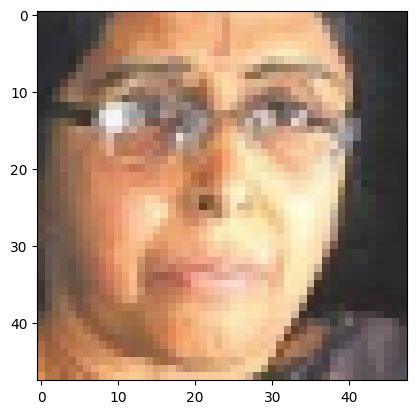

In [192]:
plt.imshow(removed_img)